# k平均法による画像の減色処理

In [1]:
import numpy as np
from numpy.random import randint
from PIL import Image
numpy.random.seed(10)

## Parameters

In [2]:
Colors = [2, 3, 5, 16]  # 減色後の色数（任意の個数の色数を指定できます）

## k平均法による減色処理

In [3]:
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)
    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print("Initial centers:")
    print(map(lambda x: x.tolist(), center))
    print("========================")
    distortion = 0.0
    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0
        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
            center_new[i] = center_new[i] // num_points[i]
        center = center_new
        print(map(lambda x: x.tolist(), center))
        print("Distortion: J=%d" % distortion_new)
        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
    # 画像データの各ピクセルを代表色で置き換え
    for pix, point in enumerate(pixels):
        pixels[pix] = tuple(center[cls[pix]])
    return(pixels)

## Main

In [4]:
for k in Colors:
    print("")
    print("========================")
    print("Number of clusters: K=%d" % k)
    # 画像ファイルの読み込み
    im = Image.open("photo.jpg")
    pixels = list(im.convert('RGB').getdata())
    # k平均法による減色処理
    result = run_kmeans(pixels, k)
    # 画像データの更新とファイル出力
    im.putdata(result) # Update image
    im.save("output%02d.bmp" % k, "BMP")


Number of clusters: K=2
Initial centers:
Distortion: J=6514490419
Distortion: J=900387217
Distortion: J=898805033
Distortion: J=898844065

Number of clusters: K=3
Initial centers:
Distortion: J=3579384152
Distortion: J=601613988
Distortion: J=586815483
Distortion: J=583110135
Distortion: J=581055722
Distortion: J=579822489
Distortion: J=578895071
Distortion: J=578180483
Distortion: J=577729992

Number of clusters: K=5
Initial centers:
Distortion: J=3482282097
Distortion: J=556152721
Distortion: J=288022862
Distortion: J=262102073
Distortion: J=256766349
Distortion: J=254897212
Distortion: J=254151833
Distortion: J=253854337
Distortion: J=253734804

Number of clusters: K=16
Initial centers:
Distortion: J=1651408442
Distortion: J=149011138
Distortion: J=119127573
Distortion: J=107443921
Distortion: J=101452977
Distortion: J=98768674
Distortion: J=96963989
Distortion: J=95426895
Distortion: J=94043606
Distortion: J=92412784
Distortion: J=89812850
Distortion: J=87513053
Distortion: J=8635

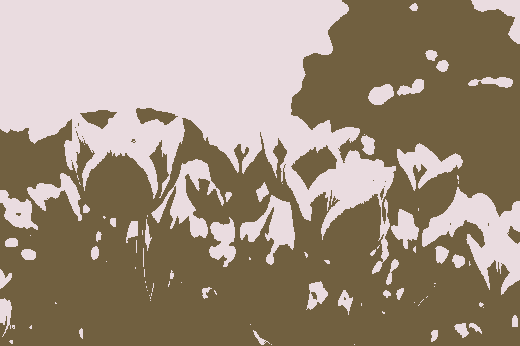

In [5]:
Image.open("output02.bmp")

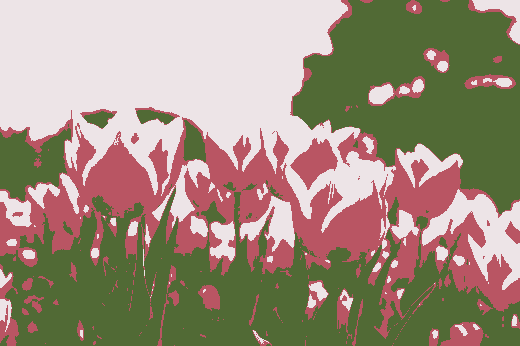

In [6]:
Image.open("output03.bmp")

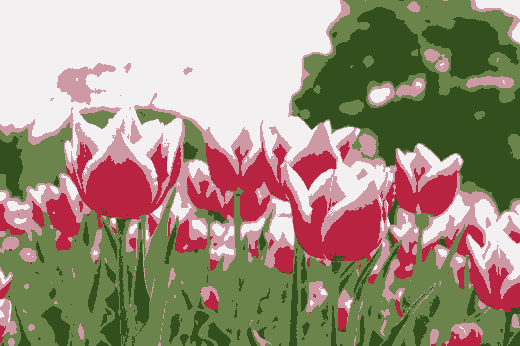

In [7]:
Image.open("output05.bmp")

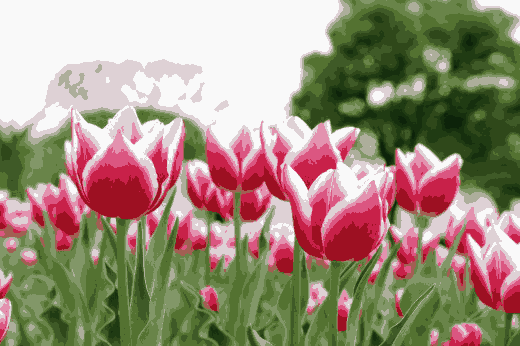

In [8]:
Image.open("output16.bmp")